# Modelo predictivo de precios de autos usados <a class='tocSkip'></a>

The used car sales service **Rusty Bargain** is developing an app to attract new customers. Thanks to this app, you can quickly find out the market value of your car. You have access to the history: technical specifications, equipment versions and prices. You have to create a model that determines the market value.

Rusty Bargain is interested in:
- the quality of the prediction;
- the speed of the prediction;
- the time required for training

**Note that the speed of the prediction depends on the processing power of the computer used, so these should be relative from one computer to another**.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#Data-load" data-toc-modified-id="Data-load-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data load</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Duplicate-values" data-toc-modified-id="Duplicate-values-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Duplicate values</a></span></li><li><span><a href="#Variable-elimination" data-toc-modified-id="Variable-elimination-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Variable elimination</a></span></li><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Missing values</a></span></li><li><span><a href="#Outliers-in-numerical-variables" data-toc-modified-id="Outliers-in-numerical-variables-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Outliers in numerical variables</a></span></li><li><span><a href="#Intermediate-conclusions-(Pre-prosessing)" data-toc-modified-id="Intermediate-conclusions-(Pre-prosessing)-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Intermediate conclusions (Pre-prosessing)</a></span></li></ul></li><li><span><a href="#Data-segmentation" data-toc-modified-id="Data-segmentation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data segmentation</a></span><ul class="toc-item"><li><span><a href="#Segmentation-with-OHE-coding" data-toc-modified-id="Segmentation-with-OHE-coding-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Segmentation with OHE coding</a></span></li><li><span><a href="#Segmentation-without-coding" data-toc-modified-id="Segmentation-without-coding-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Segmentation without coding</a></span></li></ul></li></ul></li><li><span><a href="#Model-training" data-toc-modified-id="Model-training-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model training</a></span><ul class="toc-item"><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Linear regression</a></span></li><li><span><a href="#Regression-Tree" data-toc-modified-id="Regression-Tree-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Regression Tree</a></span></li><li><span><a href="#Regression-random-forest" data-toc-modified-id="Regression-random-forest-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Regression random forest</a></span></li><li><span><a href="#LightGBM-Regressor" data-toc-modified-id="LightGBM-Regressor-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>LightGBM Regressor</a></span></li><li><span><a href="#Catboost-Regressor" data-toc-modified-id="Catboost-Regressor-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Catboost Regressor</a></span></li></ul></li><li><span><a href="#Model-analysis" data-toc-modified-id="Model-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model analysis</a></span></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Recommendations</a></span></li></ul></div>

In [13]:
# Basic libraries
import re                                              # Regular expressions
import warnings                                        # Display warnings
import sidetable                                       # Summary tables
import numpy as np                                     # Arrays manipulation
import pandas as pd                                    # DataFrames manipulation
import seaborn as sns                                  # Plotting
import matplotlib.pyplot as plt                        # Plotting
import warnings                                        # Handle code warnings
warnings.filterwarnings("ignore")        

# Preprocessing, metrics and model selection
from sklearn.metrics import mean_squared_error         # MSE
from sklearn.preprocessing import StandardScaler       # Scale numeric features
from sklearn.model_selection import GridSearchCV       # Model selection
from sklearn.model_selection import cross_val_score    # Cross validation
from sklearn.model_selection import train_test_split   # Subsetting

# Regression models
from lightgbm import LGBMRegressor                     # LightGBM
from catboost import CatBoostRegressor                 # Catboost
from sklearn.tree import DecisionTreeRegressor         # Regression tree
from sklearn.linear_model import LinearRegression      # Linear regression
from sklearn.ensemble import RandomForestRegressor     # Random forest regressor

## Data preparation

### Data load

The data to be worked with in this project are stored in the DataFrame **`cars`** which consists of the following **characteristics**.

* `DateCrawled`: date on which the profile was downloaded from the database.
* `VehicleType`: vehicle body type.
* `RegistrationYear`: year of registration of the vehicle
* `Gearbox`: Gearbox type
* `Power`: power (hp)
* `Model`: vehicle model
* `Mileage`: mileage (measured in km according to the regional specificities of the dataset)
* `RegistrationMonth`: month of vehicle registration
* `FuelType`: fuel type
* `Brand`: vehicle maker
* `NotRepaired`: vehicle repaired or not repaired
* `DateCreated`: date of creation of the profile
* `NumberOfPictures`: number of pictures of the vehicle
* `PostalCode`: postal code of the profile owner (user) 
* `LastSeen`: date of the last time the user was active.

Our **target** variable is:
* `Price`: price (in euros)

Then I load the data into the DataFrame **`cars`** and examine its information.

In [2]:
# Load data DataFrame 'cars'
cars = pd.read_csv('datasets/car_data.csv')

# Info 'cars'
print(cars.info(),'\n')

# Description of numeric variables
print(cars.describe(),'\n')

# Missing values
cars.stb.missing(clip_0=True, style=True)

# DataFrame head
cars.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
336396,04/04/2016 13:58,8950,coupe,1982,auto,185,sl,150000,5,petrol,mercedes_benz,no,04/04/2016 00:00,0,68782,06/04/2016 15:46
120446,20/03/2016 23:38,19500,coupe,2012,manual,170,c_klasse,100000,7,gasoline,mercedes_benz,no,20/03/2016 00:00,0,72202,07/04/2016 09:17
339820,05/03/2016 16:30,2700,bus,2004,NaN,136,c_max,150000,3,gasoline,ford,yes,05/03/2016 00:00,0,60437,07/03/2016 12:45
96715,09/03/2016 19:25,2500,sedan,2003,NaN,0,a3,150000,4,petrol,audi,no,09/03/2016 00:00,0,57567,12/03/2016 06:16
311473,03/04/2016 00:36,1750,sedan,1997,manual,150,a4,150000,4,petrol,audi,yes,03/04/2016 00:00,0,84347,03/04/2016 01:59
202559,29/03/2016 13:56,1499,bus,2004,NaN,0,other,150000,3,gasoline,mazda,no,29/03/2016 00:00,0,59071,31/03/2016 06:44
150675,12/03/2016 14:42,15000,NaN,2012,manual,135,tucson,30000,12,NaN,hyundai,no,12/03/2016 00:00,0,66976,14/03/2016 06:15
334147,02/04/2016 23:56,2390,sedan,1999,manual,170,3er,150000,12,petrol,bmw,no,02/04/2016 00:00,0,74918,07/04/2016 08:16
310253,02/04/2016 20:25,5000,sedan,2008,auto,77,other,150000,8,hybrid,toyota,no,02/04/2016 00:00,0,35428,06/04/2016 13:15
254345,24/03/2016 07:00,16490,wagon,2009,auto,170,NaN,90000,11,gasoline,audi,no,24/03/2016 00:00,0,6647,06/04/2016 22:45


The DataFrame **`cars`** consists of 354369 car entries registered in March and April 2016. 

There are the following potential problems with the data:

* **Duplicate cases**: although not evident so far, let's check for duplicate values.


* **Missing values**: five variables have data representing between ~6 to 20% of the data.


* Redundant category levels**: the `FuelType` variable has the category levels `'gasoline'` and `'petrol'`, however this unnecessarily increases the number of levels within this category and may affect model predictions.


* Outliers in numerical variables**: when reviewing the statistics of numerical variables, there are extreme or invalid values, for example in `RegistrationYear` there are values between 1000 and 9999, so it is necessary to review such outliers. Similarly `Price` shows values in zero (`'0'`).


In the next sub-section we preprocess the data taking into account those variables that may be useful for model prediction.

### Data preprocessing
Next I clean the data to feed the predicted models. 

#### Duplicate values
Before proceeding to clean the data, I will first check the entire feature set for duplicate values and discard them. Duplicate cases are those cases whose input values match in all their features.

In [3]:
# Number of duplicates
print('Casos duplicados:', cars.duplicated().sum())

# Drop duplicates
cars.drop_duplicates(inplace=True)

# Size DataFrame 'cars'
cars.shape

Casos duplicados: 262


(354107, 16)

#### Variable elimination

I will now discard variables that do not provide predictive value for our target variable (`Price`). 

Since the data I am analyzing pertain to records created between March and April 2016 -- the date the profile was created (`DataCreated`), its download into the system (`DateCrawled`) and its last visit (`LastSeen`) -- their variation does not help predict the price of the car so I eliminate these three date-type variables.

The variable `NumberOfPictures` also has no variation since no record in the dataset has any non-zero value, i.e. no car shows any pictures. It is also unlikely that this feature will influence the final price of the car so it will also be removed from the features.

The postal code `PostalCode` is a categorical variable. This variable provides little predictive power for the final selling price of a vehicle so it will be removed.

Finally, the month of registration `RegistrationMonth` is not expected to carry more weight than the year of vehicle registration so this categorical variable will be dropped.

I will discard the above six variables from our data set.

In [4]:
# Drop variables with low predictive power
cars.drop(['DateCrawled','DateCreated','LastSeen','NumberOfPictures', 
           'PostalCode', 'RegistrationMonth'], axis=1, inplace=True)

# Size DataFrame 'cars'
cars.shape

(354107, 10)

I have reduced the number of variables in the DataFrame **`cars`** from 16 to 10 variables.

The model of a car is linked to its brand (``Brand``) so it is possible to eliminate the `Brand` variable to reduce the complexity and training time of the model. First let's make sure that a car model is not assigned to two different brands, i.e. that there is a 1 to 1 relationship between model and brand.

In [5]:
# Number of brands by model 
cars.pivot_table(index='Model', values='Brand', aggfunc='nunique').reset_index().sort_values(by='Brand', ascending=False).head(10)

,Model,Brand
166,other,39
117,grand,3
108,freelander,2
91,discovery,2
5,1_reihe,2
148,matiz,2
89,defender,2
14,5_reihe,2
10,3_reihe,2
168,pajero,1


Except for the `'other'` model, there are 8 models that have more than one brand assigned to them. We will check model by model and correct if possible.

In [6]:
# Correction of 'grand' models for three different brands
cars.loc[cars['Model']=='grand']['Brand'].value_counts()

jeep        241
suzuki      210
chrysler    110
Name: Brand, dtype: int64

The `'grand'` model is found in three brands `'jeep'`, `'suzuki'` and `'chrysler'` which correspond to the grand cherokee, grand vitara and grand voyager models respectively. We will replace these values where they correspond.

In [7]:
# Replace model according to brand for 'grand' models
cars.loc[(cars['Brand']=='jeep')&(cars['Model']=='grand'), 'Model'] = 'grand_cherokee'
cars.loc[(cars['Brand']=='suzuki')&(cars['Model']=='grand'), 'Model'] = 'grand_vitara'
cars.loc[(cars['Brand']=='chrysler')&(cars['Model']=='grand'), 'Model'] = 'grand_voyager'

Now let's see the model `'freelander'`.

In [8]:
cars.loc[cars['Model']=='freelander']['Brand'].value_counts()

land_rover    215
rover           3
Name: Brand, dtype: int64

In [9]:
# Replace 'rover' by 'land_rover' 
cars.loc[cars['Brand']=='rover', 'Brand'] = 'land_rover'

The rebranding from `'rover'` to `'land_rover'` affected the `'freelander'` and `'discovery'` models. Let us now look at the `'3_reihe'` model.

In [10]:
cars.loc[cars['Model']=='3_reihe']['Brand'].value_counts()

peugeot    2170
mazda      1321
Name: Brand, dtype: int64

Models ending in `'_reihe'` refer to the number of rows (from the German term **'Reihe' - row**). So models with this type of name will be deleted as they do not have a valid model name.

In [11]:
# Delete cases where Model is '_reihe'
car_models = cars['Model'].dropna().unique().tolist()
reihe_models = []

for car in car_models:
    if re.search(r'_reihe', car):
        reihe_models.append(car)

print(reihe_models,'\n')
print('Number models to delete:',len(reihe_models))

# Delete reihe models
print('Number of deleted cases:',cars[cars['Model'].isin(reihe_models)].shape[0])

# Drop cases
cars = cars[~cars['Model'].isin(reihe_models)]

['2_reihe', '3_reihe', 'xc_reihe', 'z_reihe', 'i_reihe', '6_reihe', '5_reihe', 'rx_reihe', '1_reihe', '4_reihe', 'x_reihe', 'mx_reihe', 'cr_reihe', 'c_reihe', 'm_reihe', 'cx_reihe'] 

Number models to delete: 16
Number of deleted cases: 17649


We eliminated 17649 cases whose number contained the word `'reihe'`.

Finally we are going to search the cases for the model `'nuance'`.

In [12]:
cars.loc[cars['Model']=='matiz']['Brand'].value_counts()

chevrolet    283
daewoo       159
Name: Brand, dtype: int64

The `'matiz` model has been manufactured by two different brands, between 2005 and 2009 by Daewoo and from 2010 onwards by Chevrolet. For this particular case, I am not going to make any changes since I expect that the year of registration and not the maker of the model will influence its final selling price.

**Once I have corroborated that each model corresponds to a single brand, I proceed to eliminate the `Brand`** variable.

In [14]:
# Delete Brand variable
cars.drop('Brand', axis=1, inplace=True)

#### Missing values

Five variables have missing values (`NotRepaired`, `VehicleType`, `FuelType`, `Gearbox` and `Model`). Because all variables with missing values are categorical, their imputation is not possible by numerical measures of centrality (_i.e._ mean or median). However, vehicle type (`VehicleType`) can be imputed according to car model (`Model`).

* Vehicle type `VehicleType`** **Vehicle type is related to the vehicle model.

The vehicle type is related to the car model. However, the data shows more than one vehicle type per model. Let's take for example the `'golf'` model, which has 8 different categories. 

In [15]:
# 'VehicleType' for 'golf' model
cars.loc[cars['Model']=='golf', 'VehicleType'].value_counts()

sedan          14735
small           3910
wagon           3178
convertible     1959
bus              760
coupe            429
other            185
suv               25
Name: VehicleType, dtype: int64

In order to reduce the level of categories per vehicle, I will impute the vehicle type per model with the highest number of entries. For example for the model `'golf'` it would be `'sedan'` since it is the category with the most entries. This process will only be done for records with a specified model, _i.e._ categories like `'nan'` and `'other'` will not be considered.

In [16]:
# Number of records by 'VehicleType'
model_type = cars.pivot_table(index=['Model','VehicleType'],aggfunc='size').reset_index()

# Rename columns
model_type.columns = ['Model', 'VehicleType', 'Frequency']

# Order by model and VehicleType frequency
model_type = model_type.sort_values(by=['Model','Frequency'], ascending=[True,False])

# Drop cases where  Model=='other'
model_type_no_other = model_type.loc[model_type['Model']!='other']

# Get category with the highest number of entries 
model_good = model_type_no_other.groupby('Model')['VehicleType'].agg('first').reset_index()

# Majority categories (models by vehicle type)
print(model_good['VehicleType'].value_counts())

sedan          58
small          52
suv            37
bus            34
wagon          33
coupe          11
convertible     8
other           2
Name: VehicleType, dtype: int64


We are left with 8 different categories of `VehicleType` in the pivot table with which I will impute the missing values in **`cars`** under the variable `TypeVehicle_good`.

In [17]:
# Create 'VehicleType_good' column using the pivot_table 'model_good'
cars = cars.join(model_good.set_index('Model'), on='Model', rsuffix='_good')

# Replace missing values and 'other' model with its original value 
cars.loc[(cars['Model']=='other')&(cars['VehicleType_good'].isna()), 'VehicleType_good'] = cars['VehicleType']

In [18]:
# Check for missing values
cars.stb.missing(clip_0=True, style=True)

,missing,total,percent
NotRepaired,"68,710","336,458",20.42%
VehicleType,"36,399","336,458",10.82%
FuelType,"31,874","336,458",9.47%
VehicleType_good,"21,559","336,458",6.41%
Model,"19,701","336,458",5.86%
Gearbox,"19,261","336,458",5.72%


We reduced the number of missing values for vehicle type by 4.41%. Additionally, we established a single vehicle type by setting only one category per model in the `VehicleType_good` variable. This cleaned variable will be considered to feed the prediction models so we are going to eliminate the `VehicleType` variable.

In [19]:
# Drop 'VehicleType'
cars.drop('VehicleType', axis=1, inplace=True)

* **Fuel type `FuelType`**.

Now let's analyze the fuel type. This variable, has the following levels: 
* 'petrol'
* 'gasoline
* 'lpg': liquefied petroleum gas
* 'cng': compressed natural gas
* 'hybrid
* 'electric' * 'electric
* 'other

The levels `'petrol'` and `'gasoline'` refer to the same type of fuel known in America as gasoline, `'petrol'` is the term used in the UK. Because of this we will reduce the number of levels for `FuelType` by unifying `'petrol'` and `'gasoline'` under the same `'gasoline'` level.

In [20]:
# Replace 'petrol' by 'gasoline'
cars.loc[cars['FuelType']=='petrol', 'FuelType'] = 'gasoline'

# Cases by 'FuelType'
cars['FuelType'].value_counts(dropna=False)

gasoline    298432
NaN          31874
lpg           5083
cng            564
hybrid         216
other          200
electric        89
Name: FuelType, dtype: int64

We have reduced the number of categories by collapsing `'petrol'` and `'gasoline'` into the same category. There are still missing values in this category. In this case it is not possible to impute the fuel type based on another categorical variable since a model can have versions that run on different fuel types e.g. the `'zafira'` model has 4 different fuel types.

However, we will re-categorize all cases with missing values as `other`. 

In [21]:
# Re-categorize missing 'FuelType' as 'other'
cars.loc[cars['FuelType'].isna(), 'FuelType'] = 'other'

* No Repairs `NotRepaired` ** **NotRepaired

This variable refers to whether the vehicle has not undergone major repairs. This variable takes two values `'yes'` or `'no'` so missing values will be replaced by `'unknow'`.

In [22]:
# Replace missing 'NotRepaired' by 'unknow'
cars.loc[cars['NotRepaired'].isna(), 'NotRepaired'] = 'unknow'

**Type of transmission `Gearbox`**.

The transmission type of a car can be either `manual` or `automatic`. Automatic vehicles are usually more expensive than manual transmissions. There are several models in the market manufactured in both versions so we cannot impute the type of transmission according to the model of the vehicle. In this case I will also impute missing values as `unknow`.

In [23]:
# Replace missing 'Gearbox' as 'unknow'
cars.loc[cars['Gearbox'].isna(), 'Gearbox'] = 'unknow'

# Value counts 'Gearbox'
cars['Gearbox'].value_counts(dropna=False)

manual    253070
auto       64127
unknow     19261
Name: Gearbox, dtype: int64

* **Model `Model`** model

The car model is also not a variable that can be imputed using another categorical variable, so we are going to eliminate from the data set the rows with missing values in this variable. We consider it necessary to make this change since the model of the car largely determines the price of the car. However, there are many entries with the model specified as ``other'`` for different automotive brands (`Brand`). I will quantify the following: 

* Number of entries with the model specified as `'other'`, 

* Number of brands (`Brand`) with models `'other'`, 

* Number of entries and percentage of data where `Model` is absent (`nan`) or `'other'`, 

In [24]:
# Number of entries of Model == 'other'
other_cases = cars.loc[cars['Model']=='other', 'Model'].count()

# Nomber of entries where 'Model' is  'nan' or 'other'
other_nan_cases = cars.loc[(cars['Model']=='other')|(cars['Model'].isna()), 'Price'].count()

# Percentage of combined entries 
other_nan_cases_pct = other_nan_cases / cars.shape[0]

print(f'Number of cases where the model is "other": {other_cases}')
print(f'Number of combined "nan" and "other" cases: {other_nan_cases}')
print(f'Percentage of combined data:                {other_nan_cases_pct:.2%}')

Number of cases where the model is "other": 24402
Number of combined "nan" and "other" cases: 44103
Percentage of combined data:                13.11%


Cases where the vehicle model is absent (`nan`) or `'other'` represent **13.11%** of the cases. 

Although the cases represent a relatively high percentage of our original set, I consider it appropriate to **eliminate these cases**. The model of a car is a feature that largely determines the price of a car. The make of the car does not always carry a great deal of weight even though there are makes that are usually more expensive (_e.g._ 'Mercedes Benz', 'Land Rover', etc) than others. Feeding the model with these cases could affect the quality of its predictions (_'garbage in garbage out'_) so I prefer to sacrifice the quantity of the data for its quality.

In [25]:
# Drop cases where  'Model' is NaN or 'other'
cars = cars.loc[(cars['Model']!='other')&(cars['Model'].notna())]

# Size DataFrame 'cars'
print('Size of DataFrame "cars":', cars.shape[0])

# Check for missing values
cars.stb.missing(clip_0=True, style=True)

Size of DataFrame "cars": 292355


,missing,total,percent


We have treated the missing values of the categorical variables and eliminated the cases that are not useful to my consideration for the prediction of the selling price of a vehicle registered in the platform. The levels of the `VehicleType` and `FuelType` variables were also reduced and homogenized. The `VehicleType` variable is replaced by the `VehicleType_good` variable which has the categories homogenized according to most cases according to the car model.

In the next subsection I analyze outliers in the numerical variables.


#### Outliers in numerical variables

Now I am going to analyze the numerical variables for outliers. The numeric variables are `Price`, `RegistrationYear`, `Power` and `Mileage`. Let's look at the distribution of values for outliers for each variable.

               Price  RegistrationYear          Power        Mileage
count  292355.000000     292355.000000  292355.000000  292355.000000
mean     4478.034564       2004.046796     111.078076  129373.330369
std      4503.671251         63.234369     192.544119   36601.484229
min         0.000000       1000.000000       0.000000    5000.000000
25%      1149.000000       1999.000000      69.000000  125000.000000
50%      2800.000000       2003.000000     105.000000  150000.000000
75%      6500.000000       2008.000000     143.000000  150000.000000
max     20000.000000       9999.000000   20000.000000  150000.000000


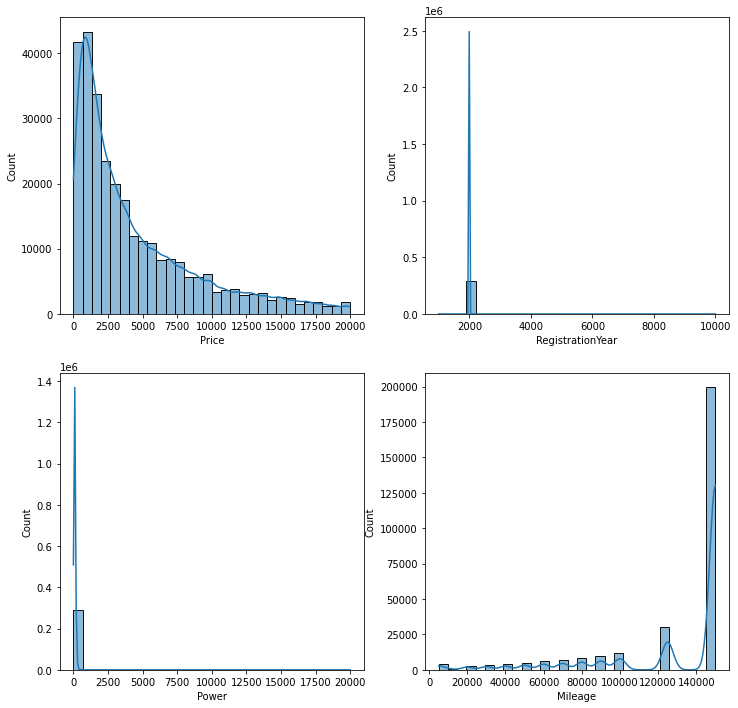

In [26]:
# Basic stats numeric variables
print(cars.describe())

# Plot features (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12,12))

# Create histograms
sns.histplot(data=cars, x='Price', bins=30, kde=True, ax=axes[0,0])
sns.histplot(data=cars, x='RegistrationYear', bins= 30, kde=True, ax=axes[0,1])
sns.histplot(data=cars, x='Power', bins=30, kde=True, ax=axes[1,0])
sns.histplot(data=cars, x='Mileage', bins=30, kde=True, ax=axes[1,1])
plt.show()

According to the statistics and histograms of each numerical variable, there are outliers in both the lower and upper bounds of `RegistrationYear`, `Power` and `Price`. Let's clean up variable by variable by removing the outliers.

**Registration Year `RegistrationYear`**.

75% of the vehicles are registered between 1999 and 2008. There are outliers and invalid values such as 1000 and 9999. First we will **eliminate cases with a registration year greater than 2016** since the data provided for the analysis comes from registrations made in that year. 

In [27]:
# Cases RegistratioYear > 2016
print('Cars with a registration higher than 2016:',cars.query('RegistrationYear > 2016').shape[0])

# Drop cases > 2016
cars = cars.loc[cars['RegistrationYear']<= 2016]

cars.shape[0]

Cars with a registration higher than 2016: 11509


280846

I eliminated 11509 with an invalid registration year at the upper cutoff (_i.e._ > 2016). 

The lower cutoff point is going to be arbitrarily determined, **cases whose vehicle age is not older than 30 years** i.e. whose registration year is greater than or equal to 1986 will be included considering that the data was collected in 2016. 

Although there are certainly older vehicles, it is possible that older cars have a huge price variation because they can be sold either very cheap due to their high mileage or very expensive because they are considered classics.

These cases are very particular because the selling price depends on the make and condition of the vehicle. For example the VW model `'kaefer'` is a car that has been produced since 1946 and shows a great price variation as shown in the following graph.

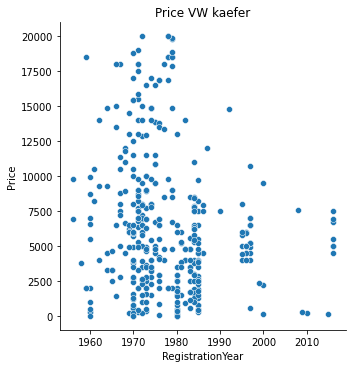

In [28]:
# Price dispersion of  VW kaefer between 1946 and 2016
kaefer = cars.query('Model == "kaefer" & Price > 0 & RegistrationYear > 1945')
sns.relplot(data=kaefer, x='RegistrationYear', y='Price', kind='scatter')
plt.title('Price VW kaefer')
plt.show()

In [29]:
# Cars with more than 30 years
print('Cars with a registration year less than 1986:',cars.query('RegistrationYear < 1985').shape[0])

# Eliminar registros menores a 1986
cars = cars.loc[cars['RegistrationYear']>= 1986]

print('Cars with less than 30 years:', cars.shape[0])

Cars with a registration year less than 1986: 2030
Cars with less than 30 years: 278429


I have filtered only vehicles with a maximum age of 30 years old in 2016 according to their year of registration.

* **Power `Power`**.

Power is recorded in hp (_Cheval-Vapeur_) or horsepower. One horsepower equals 0.99 HP or horsepower. 

There can be no vehicles with zero hp as this is an invalid error. Likewise cars with excessive values (see maximum value: 20000 equivalent to 19726 HP) can also be interpreted as a user error when registering the vehicle.

Between 1986 and 2016 the range of engines was between 89 and 1521 HP which is equivalent to a range between 88 and 1500 HP (the most powerful models are manufactured by Koenigsegg and Bugatti, brands not included in the base). However, the average for the 2010s is 203 hp equivalent to 200 HP.

As can be seen in the graph below, the range of hp is disproportionate and there is no apparent grouping by car model so this variable introduces a lot of noise. Because of this large variation, I choose **not to use `Power` to construct the pedictive models**.

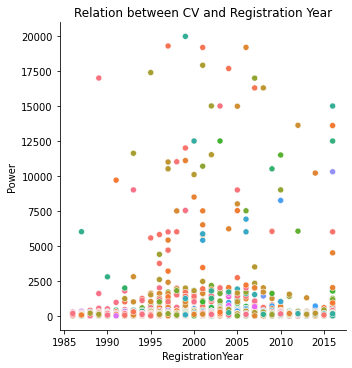

In [30]:
sns.relplot(data=cars, x='RegistrationYear', y='Power', hue='Model', legend=False, kind='scatter')
plt.title('Relation between CV and Registration Year')
plt.show()

In [31]:
# Delete column Power
cars.drop('Power', axis=1, inplace=True)

**`Mileage`**.

The mileage shows reasonable values between 500 and 150,000 and therefore **I do not perform any cleaning**. However, it is curious to note that, contrary to expectations (a negative relationship), there is no relationship between the age of the vehicle and its mileage as shown in the following graph.

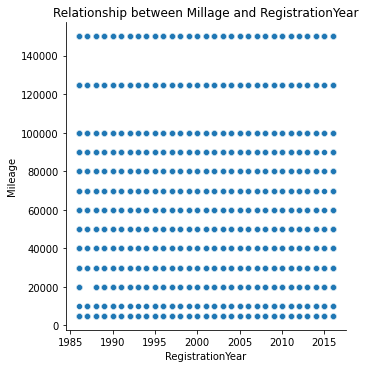

In [32]:
# Scatter pplot Millage and RegistrationYear.
sns.relplot(data=cars, x='RegistrationYear', y='Mileage', kind='scatter')
plt.title('Relationship between Millage and RegistrationYear')
plt.show()

**`Price`**.

Finally, the only value that will be eliminated in the variable `Price` are those cases whose price is equal to zero since this is an invalid price for our purpose; however there are cases with prices even very low (_e.g._ 3 Euros). For this variable I arbitrarily choose a **minimum sales value of 100 Euros**.

In [33]:
# Filter cases with a Price >= 100
cars = cars.loc[cars['Price']>=100]

print('Size filtered DataFrame:', cars.shape[0])

Size filtered DataFrame: 269909


#### Intermediate conclusions (Pre-prosessing)

After cleaning the database I reduced the number of cases from 354369 to 269909 while retaining **~78% of the original data**. I also reduced the number of variables from 15 to 8 which will be used to build the predictive models of the selling price of the vehicles registered in the platform. 

I have finished the data cleaning process. In the next section I will divide the data into training and test subsets for the following models:

1. Linear Regression
2. Regression tree 
3. Random forest regression
4. LigthGBM
5. CatBoost

The first three models require coding the categorical variables before building the models, while the last two models do not require this task. Because of this I will create two copies of the clean data set.

### Data segmentation

In this section I will segment the data into training and test subsets for the following models:

1. Linear Regression
2. Regression tree 
3. Random forest regression
4. LigthGBM
5. CatBoost

The first three models require **coding the categorical variables** before building the models, while the last two models do not require this task. Because of this I will create two copies of the clean data set, one categorized and one uncategorized. For both models, the numerical variables will be standardized.

#### Segmentation with OHE coding

For regression models that cannot handle categorical variables (_e.g._ `Gearbox`, `Model`, `Brand`) it is necessary to transform these variables into numerical ones. I will employ the One-Hot-Encoding (**OHE**) technique for this task. The encoded data will be stored in the DataFrame **`cars_ohe`**.


I will then divide the resulting DataFrame into training and test subsets using a 3:1 ratio. The resulting sets will be named as follows:

* **`fohe_train`**: Set of coded training features
* **`fohe_test`**: Set of coded test features
* **`tohe_train`**: Target training variable
* **`tohe_test`**: Target test variable

Finally I will scale the numerical variables (`RegistrationYear`, `Mileage`) of my training and test feature set by standardizing the data.

In [34]:
# Ohe encoding 'cars_ohe'
cars_ohe = pd.get_dummies(cars, drop_first=True)

# cars_ohe head
cars_ohe.head()

,Price,RegistrationYear,Mileage,Gearbox_manual,Gearbox_unknow,Model_145,Model_147,Model_156,Model_159,Model_1er,...,FuelType_other,NotRepaired_unknow,NotRepaired_yes,VehicleType_good_convertible,VehicleType_good_coupe,VehicleType_good_other,VehicleType_good_sedan,VehicleType_good_small,VehicleType_good_suv,VehicleType_good_wagon
0,480,1993,150000,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,9800,2004,125000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1500,2001,150000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3600,2008,90000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,650,1995,150000,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [35]:
# Features selection
features_ohe = cars_ohe.drop('Price', axis=1)

# Target selection
target_ohe = cars_ohe['Price']

In [36]:
# Data segmentation
fohe_train, fohe_test, tohe_train, tohe_test = train_test_split(features_ohe, target_ohe, 
                                                                 test_size=0.25, random_state=12345)

print("Training feature set 'fohe_train':", fohe_train.shape)
print("Test feature set 'fohe_test':     ", fohe_test.shape)
print("Set of training target variable:  ", tohe_train.shape)
print("Set of test target variable:      ", tohe_test.shape)

Training feature set 'fohe_train': (202431, 249)
Test feature set 'fohe_test':      (67478, 249)
Set of training target variable:   (202431,)
Set of test target variable:       (67478,)


In [37]:
pd.options.mode.chained_assignment = None

# Scale of numeric variables
numeric = ['RegistrationYear', 'Mileage']
scaler = StandardScaler()

scaler.fit(fohe_train[numeric])
fohe_train[numeric] = scaler.transform(fohe_train[numeric])
fohe_test[numeric] = scaler.transform(fohe_test[numeric])

# Data viz
fohe_train.head()

,RegistrationYear,Mileage,Gearbox_manual,Gearbox_unknow,Model_145,Model_147,Model_156,Model_159,Model_1er,Model_200,...,FuelType_other,NotRepaired_unknow,NotRepaired_yes,VehicleType_good_convertible,VehicleType_good_coupe,VehicleType_good_other,VehicleType_good_sedan,VehicleType_good_small,VehicleType_good_suv,VehicleType_good_wagon
175638,-0.211831,-0.127034,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
136996,-0.389147,0.567647,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
83198,-1.275728,0.567647,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158006,-0.566464,-1.377459,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
333149,-0.211831,0.567647,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


I created the training and test subsets for the characteristic and target variables by pre-coding them using the OHE technique; finally I scaled the numerical variables by standardizing them.

#### Segmentation without coding

Now I will create the training and test sets for the `LigthGBM` and `CatBoost` models which can handle categorical variables without coding. 

First I will create a copy of the DataFrame **`cars`** to train the mentioned models and it will be stored in the DataFrame **`cars_cat`**. Subsequently I will create the following training and test subsets, in a 3:1 ratio, which will be stored in the following DataFrames:

* ** **`fcat_train`**: Training feature set.
* ** **`fcat_test`**: Set of test features
* ** **`tcat_train`**: Training target variable
* ** **`tcat_test`**: Test target variable

Finally, numerical variables (`RegistrationYear`, `Mileage`) will be scaled in the same way as done in the previous subsection.

In [38]:
# Copy DataFrame cars in cars_cat
cars_cat = cars.copy()

# Reset index
cars_cat.reset_index(drop=True, inplace = True)

In [39]:
# Features selection
features_cat = cars_cat.drop('Price', axis=1)

# Target selection
target_cat = cars_cat['Price']

In [40]:
# Data segmentation
fcat_train, fcat_test, tcat_train, tcat_test = train_test_split(features_cat, target_cat, 
                                                                 test_size=0.25, random_state=12345)

print("Training feature set 'fohe_train':", fcat_train.shape)
print("Test feature set 'fohe_test':     ", fcat_test.shape)
print("Set of training target variable:  ", tcat_train.shape)
print("Set of test target variable:      ", tcat_test.shape)

Training feature set 'fohe_train': (202431, 7)
Test feature set 'fohe_test':      (67478, 7)
Set of training target variable:   (202431,)
Set of test target variable:       (67478,)


In [41]:
pd.options.mode.chained_assignment = None

# Scaled of numeric features
numeric = ['RegistrationYear', 'Mileage']
scaler = StandardScaler()

scaler.fit(fcat_train[numeric])
fcat_train[numeric] = scaler.transform(fcat_train[numeric])
fcat_test[numeric] = scaler.transform(fcat_test[numeric])

# Data viz
fcat_train.head()

,RegistrationYear,Gearbox,Model,Mileage,FuelType,NotRepaired,VehicleType_good
133712,-0.211831,auto,fortwo,-0.127034,gasoline,no,small
104317,-0.389147,manual,astra,0.567647,gasoline,no,sedan
63364,-1.275728,manual,transporter,0.567647,gasoline,no,bus
120301,-0.566464,unknow,boxster,-1.377459,gasoline,unknow,convertible
253712,-0.211831,manual,kangoo,0.567647,gasoline,yes,bus


I have created the training and test subsets for the characteristic and target variables. The subsets will be used to train and validate the models with gradient descent.

## Model training 

In this section different models will be trained and compared in their speed and quality through the _ratio squared root mean square error_ (**RMSE**) metric.

### Linear regression

In [42]:
# Instance of model LR
lr_model = LinearRegression()

# Model fitting LR
%time lr_model.fit(fohe_train, tohe_train)

CPU times: user 9.64 s, sys: 1.04 s, total: 10.7 s
Wall time: 7.33 s


LinearRegression()

In [43]:
# Predictions model LR
%time lr_predict = lr_model.predict(fohe_test)

CPU times: user 79.9 ms, sys: 58.9 ms, total: 139 ms
Wall time: 129 ms


In [44]:
# RMSE del lr_model
lr_rmse = mean_squared_error(tohe_test, lr_predict, squared=False)
print(f'Linear regression RMSE: {lr_rmse:.2f}')

Linear regression RMSE: 2624.17


In [45]:
# Record of metrics
lr_params = {'model':'LR', 'fit_time (s)':7.33, 'pred_time (ms)':129, 'RMSE':2624.17}

### Regression Tree

For the development of this model, I will tune the maximum depth hyperparameters (`max_depth`) of the regression tree by iterating values from 1 to 10. The optimal depth will be determined according to the RMSE calculated by **cross-validation** using 5 blocks.

In [46]:
# Regression tree 
for depth in range(1,11):
    ar_model = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    ar_score = cross_val_score(ar_model, fohe_train, tohe_train, scoring='neg_root_mean_squared_error', cv=5)
    print('Max depth:', depth, '- Mean RMSE score:', np.abs(ar_score.mean()))

Max depth: 1 - Mean RMSE score: 3534.9989114046703
Max depth: 2 - Mean RMSE score: 3260.0936921428724
Max depth: 3 - Mean RMSE score: 3013.128091898086
Max depth: 4 - Mean RMSE score: 2779.6524936819815
Max depth: 5 - Mean RMSE score: 2636.167812950681
Max depth: 6 - Mean RMSE score: 2515.8176174298474
Max depth: 7 - Mean RMSE score: 2434.0844456640707
Max depth: 8 - Mean RMSE score: 2362.409270260888
Max depth: 9 - Mean RMSE score: 2304.9837639259363
Max depth: 10 - Mean RMSE score: 2251.0992849318595


The regression tree model has a depth of 10 with an average RMSE of 2251.09. We will train the regression tree model with a maximum depth of 10 and obtain its speed and quality parameters.

In [47]:
# Regression tree instance
rt_model = DecisionTreeRegressor(max_depth=10, random_state=12345)

# Model fit
%time rt_model.fit(fohe_train, tohe_train)

CPU times: user 3 s, sys: 356 ms, total: 3.35 s
Wall time: 3.54 s


DecisionTreeRegressor(max_depth=10, random_state=12345)

In [49]:
# Predictions
%time rt_predict = rt_model.predict(fohe_test)

CPU times: user 117 ms, sys: 117 ms, total: 234 ms
Wall time: 258 ms


In [50]:
# RMSE rt_model
rt_rmse = mean_squared_error(tohe_test, rt_predict, squared=False)
print(f'Regression tree RMSE: {rt_rmse:.2f}')

Regression tree RSME: 2256.74


In [51]:
# Record of metrics
ar_params = {'model':'RT', 'fit_time (s)':3.35, 'pred_time (ms)':234, 'RMSE':2256.74}

### Regression random forest

Finally I am going to build a random regression forest model, for which I will look for the best combination between the number of estimators (`n_estimators`) and the maximum depth of each tree (`max_depth`). The number of estimators will be iterated between 10 and 50 with step of 10 i.e. (10, 20, 30, 40 and 50), the maximum depth will be iterated from 1 to 10. The optimal depth and number of estimators will be determined according to the RECM calculated by cross validation using 5 blocks.

**Note**: the code where the iteration is done is not executed due to the time required to perform the iteration of each parameter and the cross validation. The best model selected by iteration is presented as executable code.

In [ ]:
#best_bar = None
#best_bar_score = 5000
#best_est = 0
#best_depth = 0
#
## Iteración con diferentes estimadores y profundidades, esto puede tomar un rato asi que ve por un café
#for est in range(10, 51, 10):
#    for depth in range(1,11):
#        bar_model = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=12345)
#        bar_score = cross_val_score(bar_model, fohe_train, tohe_train, scoring='neg_root_mean_squared_error', cv=5)
#        bar_score_mean = np.abs(bar_score.mean())
#        if bar_score_mean < best_bar_score:
#            best_bar = bar_model
#            best_bar_score = bar_score_mean
#            best_est = est
#            best_depth = depth
#
#print('Mejor RECM promedio:', best_bar_score, '| n_estimators:', best_est, '| max_depth:', best_depth)

The best random forest regression model has 40 estimators with a maximum depth of 10. We will use these hyperparameters to train our random forest regression model.

In [52]:
# Best random forest regressior
rfr_model = RandomForestRegressor(n_estimators= 40, max_depth= 10, random_state=12345)

# Model fit
%time rfr_model.fit(fohe_train, tohe_train)

CPU times: user 1min 11s, sys: 958 ms, total: 1min 12s
Wall time: 1min 15s


RandomForestRegressor(max_depth=10, n_estimators=40, random_state=12345)

In [53]:
# Predictions
%time rfr_predict = rfr_model.predict(fohe_test)

CPU times: user 301 ms, sys: 90.5 ms, total: 392 ms
Wall time: 392 ms


In [54]:
# RMSE rfr_model
rfr_rmse = mean_squared_error(tohe_test, rfr_predict, squared=False)
print(f'Random forest regressor RMSE: {rfr_rmse:.2f}')

Random forest regressor RMSE: 2211.76


In [55]:
# Registro de métricas del modelo de bosque aleatoreo de regresión lineal
bar_params = {'model':'RFR', 'fit_time (s)':72.0, 'pred_time (ms)':392, 'RMSE':2211.76}

### LightGBM Regressor

LightGBM is a gradient boosting model that uses tree-based learning algorithms. The LightGBM regressor (`LGBMRegressor`) helps when dealing with regression problems. 

This algorithm can be built with categorical variables without the need to be coded into numerical variables beforehand. However, it is necessary to transform such variables explicitly to `'category'` type. 

The `LGBMRegressor` algorithm has several hyperparameters that can be tuned. In this exercise, I will tune the following hyperparameters:

* `num_leaves`: maximum number of leaves of the base students. Values: `[10, 20, 30]`.
* `learning_rate`: learning rate of boosting gradient. Values: `[0.1, 0.3]`.
* `max_depth`: maximum depth of the base learner tree. Values: `[-1, 10]`.

The parameters will be selected using cross validation using 5 blocks set by default in the `GridSearchCV` function. Once the optimal parameters have been selected based on the RMSE of each dependent model, I will proceed to tune the final model and calculate its speed and accuracy.

In [56]:
# Transform categorical variables

categorical = ['Gearbox', 'Model', 'FuelType', 'NotRepaired', 'VehicleType_good']

for col in categorical:
    fcat_train[col] = fcat_train[col].astype('category')
    fcat_test[col] = fcat_test[col].astype('category')

# Ignore warnings
warnings.filterwarnings('ignore')

# Hyperparameters
parametros = {
    'num_leaves':[11, 21, 31],
    'learning_rate':[0.1, 0.3],
    'max_depth': [-1, 10],
    'random_state': [12345]
}

# LGBM model
lgbm = LGBMRegressor()

# Parameters settings
lgbm_gs = GridSearchCV(estimator=lgbm, param_grid=parametros, scoring='neg_mean_squared_error')

# model fit
lgbm_model = lgbm_gs.fit(X=fcat_train, y=tcat_train)
print(lgbm_model.best_params_, lgbm_model.best_score_)

{'learning_rate': 0.3, 'max_depth': -1, 'num_leaves': 31, 'random_state': 12345} -3039289.127186409


In [57]:
# Optimal LGBM model
lgbm_final = LGBMRegressor(num_leaves= 31, learning_rate= 0.3, max_depth=-1, random_state=12345)

# fit lgbm_final
%time lgbm_final.fit(X=fcat_train, y=tcat_train)

CPU times: user 2.6 s, sys: 83.4 ms, total: 2.68 s
Wall time: 770 ms


LGBMRegressor(learning_rate=0.3, random_state=12345)

In [58]:
# # Predictions
%time lgbm_predict = lgbm_final.predict(fcat_test)

CPU times: user 572 ms, sys: 15.7 ms, total: 588 ms
Wall time: 193 ms


In [59]:
# RMSE lgbm_final
lgbm_recm = mean_squared_error(tcat_test, lgbm_predict, squared=False)
print(f'LGBM regressor RMSE: {lgbm_recm:.2f}')

LGBM regressor RMSE: 1745.69


In [60]:
# Record of metrics
lgbm_params = {'model':'lgbm', 'fit_time (s)':2.68, 'pred_time (ms)':588, 'RMSE':1745.69}

### Catboost Regressor

Finally I will build the last prediction model based on the `Catboost` algorithm, this model like `LightGBM` can handle categorical variables without any prior numerical coding and is based on decision trees.

The `CatBoostRegressor` regression model has different hyperparameters that can be tuned to fit the model. The hyperparameters to be tuned will be the following:

* `learning_rate`: Learning rate. Values `[0.1, 0.3]`.
* `max_depth`: Maximum depth of the base learner tree. Values `[-1, 10]`.
Values `[-1, 10]` * `iteratons`: Number of iterations. Values `[50, 100, 150]`.

The model with the optimal hyperparameters will be selected by cross validation based on the RMSE value in the same way as described for the LGBM models. The default loss function is RMSE. 

In [61]:
categorical = ['Gearbox', 'Model', 'FuelType', 'NotRepaired', 'VehicleType_good']

# Model hiperparameters
parametros = {
    'learning_rate':[0.1, 0.3],
    'max_depth': [-1, 10],
    'iterations':[50, 100, 150],
    'random_state': [12345]
}

# Catboost regresor model
cat = CatBoostRegressor()

# Model selection based on its RMSE
cat_gs = GridSearchCV(estimator=cat, param_grid=parametros, scoring='neg_mean_squared_error')

# Model fitting and selection
cat_model = cat_gs.fit(X=fcat_train, y=tcat_train, cat_features= categorical, verbose=50)

0:	learn: 4222.1426168	total: 199ms	remaining: 9.73s
49:	learn: 1974.0230586	total: 3.25s	remaining: 0us
0:	learn: 4215.2249010	total: 121ms	remaining: 5.91s
49:	learn: 1965.9083354	total: 3.11s	remaining: 0us
0:	learn: 4233.1547598	total: 82.4ms	remaining: 4.04s
49:	learn: 1970.1288890	total: 2.9s	remaining: 0us
0:	learn: 4220.2768408	total: 82ms	remaining: 4.02s
49:	learn: 1966.8534092	total: 3.05s	remaining: 0us
0:	learn: 4211.2724695	total: 84.9ms	remaining: 4.16s
49:	learn: 1968.0053725	total: 3.08s	remaining: 0us
0:	learn: 3652.8788227	total: 68.5ms	remaining: 3.35s
49:	learn: 1861.1110997	total: 3.11s	remaining: 0us
0:	learn: 3635.5438973	total: 83.2ms	remaining: 4.07s
49:	learn: 1859.5989719	total: 3s	remaining: 0us
0:	learn: 3650.9978552	total: 87.9ms	remaining: 4.3s
49:	learn: 1871.2788639	total: 3.07s	remaining: 0us
0:	learn: 3646.7473769	total: 83.5ms	remaining: 4.09s
49:	learn: 1862.3529248	total: 3.23s	remaining: 0us
0:	learn: 3637.1454262	total: 86.2ms	remaining: 4.23s
4

In [63]:
print(cat_model.best_params_, cat_model.best_score_)

{'iterations': 150, 'learning_rate': 0.3, 'max_depth': 10, 'random_state': 12345} -3468158.5188650438


In [64]:
# Optimal Catboost model
cat_final = CatBoostRegressor(learning_rate=0.3, max_depth=10, iterations = 150, random_state=12345)

%time cat_final.fit(fcat_train, tcat_train, cat_features= categorical, verbose=50)

0:	learn: 3645.8943392	total: 158ms	remaining: 23.6s
50:	learn: 1867.8674231	total: 5.53s	remaining: 10.7s
100:	learn: 1817.7354415	total: 9.83s	remaining: 4.77s
149:	learn: 1790.5452303	total: 14.6s	remaining: 0us
CPU times: user 33.5 s, sys: 1.11 s, total: 34.6 s
Wall time: 14.9 s


In [65]:
# Predictions
%time cat_predict=cat_final.predict(fcat_test)

CPU times: user 148 ms, sys: 9.16 ms, total: 157 ms
Wall time: 97.9 ms


In [66]:
# RMSE cat_final
cat_recm = mean_squared_error(tcat_test, cat_predict, squared=False)
print(f'Catboost regressor RMSE: {cat_recm:.2f}')

Catboost regressor RMSE: 1862.08


In [67]:
# Record of metrics
cat_params = {'model':'catboost', 'fit_time (s)':14.9, 'pred_time (ms)':97.9, 'RMSE':1862.08}

## Model analysis

In this last section I will compare the models in terms of:

* training time in seconds (`fit_time (s)`)
* Prediction time in milliseconds (`pred_time (ms)`)
* Model quality according to its RMSE.

The metrics of each model are stored in the DataFrame **`models`**.

In [68]:
# Models DataFrame
models = pd.DataFrame([lr_params, ar_params, bar_params, lgbm_params, cat_params])
models

,model,fit_time (s),pred_time (ms),RMSE
0,LR,7.33,129.0,2624.17
1,RT,3.35,234.0,2256.74
2,RFR,72.00,392.0,2211.76
3,lgbm,2.68,588.0,1745.69
4,catboost,14.90,97.9,1862.08


Fit times and prediction quality vary among the different models, in both cases lower values are desirable. In the following graph we explore the relationship of model fitting time and model quality using a scatter plot. The models in the lower left corner are those with the best performance.

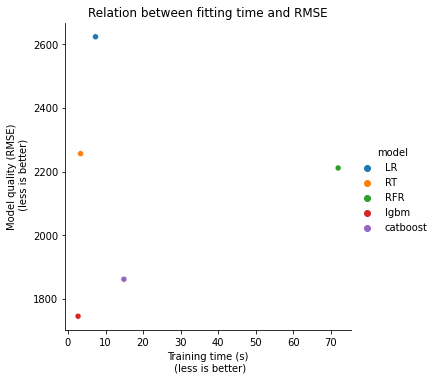

In [69]:
# Relation between fitting time and RMSE
sns.relplot(data=models, x='fit_time (s)', y='RMSE', hue='model', kind='scatter')
plt.title('Relation between fitting time and RMSE')
plt.xlabel('Training time (s)\n (less is better)')
plt.ylabel('Model quality (RMSE)\n (less is better)')
plt.show()

Models with gradient boosting show superior quality, according to their RMSE, compared to models without such a function. The LGBM model has the shortest fitting time and the highest quality (lower values are better). The next model in terms of quality is the CatBoost based model; however, the required fitting time is higher than the regression tree and the linear regression model. 

I will now compare the preduction time of each model using a bar chart. 

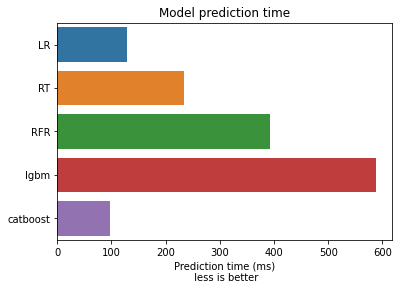

In [70]:
# Tiempos de predicción
sns.barplot(data=models, y='model', x='pred_time (ms)')
plt.title('Model prediction time')
plt.ylabel('')
plt.xlabel('Prediction time (ms)\n less is better')
plt.show()

In terms of prediction time, the best model was catboost, but this model does not perform the best. The model that takes the longest time to make predictions is the LGBM. However, since the unit of comparison is milliseconds (ms) this does not represent a long lead time. I recommend using the LGBM model, due to its short fitting time and high predictive quality relative to the other models, to make predictions of future cars entered into the **Rusty Bargain** platform. 

## Recommendations

I recommend using the LGBM model, due to its short adjustment time and high predictive quality relative to the other models, to make predictions of future cars entered in the **Rusty Bargain** platform.

Although LGBM was the best according to RMSE, the difference of its predictions with the actual sales value of each vehicle is ±1745 Euros so the model still has opportunity to improve its quality. 

Much of the model's quality lies not only in the tuning of its hyperparameters, but also in the quality of the data fed into the model. In this case, the quality of data entered into the **Rusty Bargain** platform can be improved by making it easier for the customer to enter data during vehicle registration. 

For example, ambiguities in vehicle characteristics can be avoided if the user enters the car's serial number and uses this variable to autocomplete other characteristics linked to this unique number (e.g. model, year of manufacture, make, CV, etc.). Another option in order to reduce the number of levels per categorical variable is to have 'drop' menus in the registration application with limited options to be chosen by the user.